<a href="https://colab.research.google.com/github/rahulevol/Projects/blob/main/InternshipDay4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, roc_auc_score,
    roc_curve
)


In [28]:
df = pd.read_csv('/content/data.csv')
df.drop(columns=["id", "Unnamed: 32"], inplace=True)

df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

In [29]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [32]:
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]


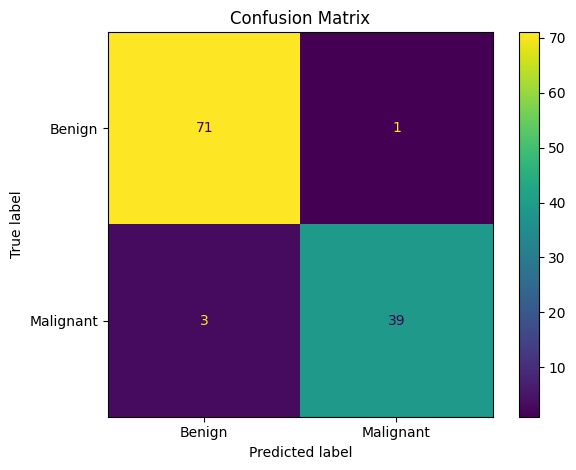

Precision: 0.975
Recall: 0.929
ROC-AUC: 0.996


In [33]:

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malignant"]).plot()
plt.title("Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")


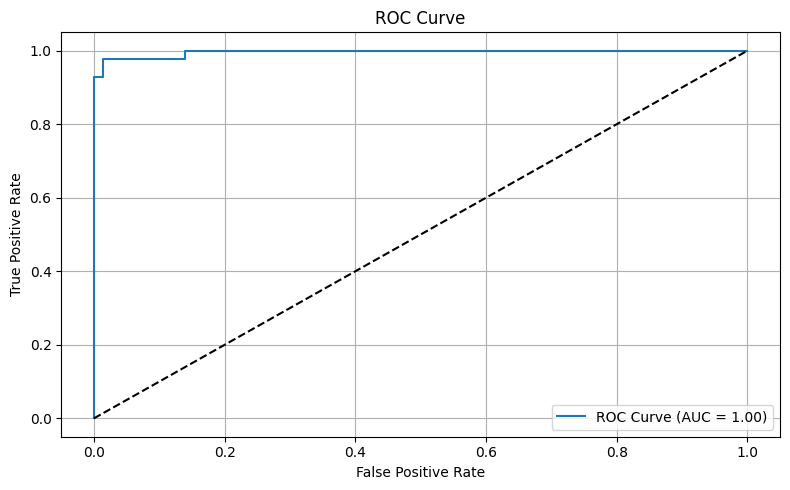

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


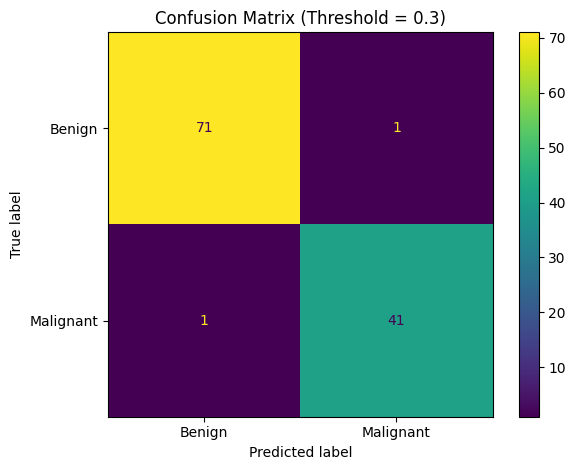

In [35]:

threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)

cm_thresh = confusion_matrix(y_test, y_pred_thresh)
ConfusionMatrixDisplay(cm_thresh, display_labels=["Benign", "Malignant"]).plot()
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.grid(False)
plt.tight_layout()
plt.show()


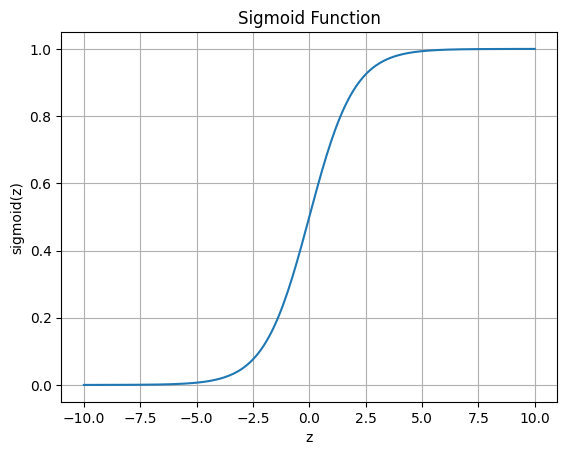

In [36]:

z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()
